## Marching Cubes Example
(This Lab demands the package [PyMCubes](https://github.com/pmneila/PyMCubes))

<IPython.core.display.Javascript object>


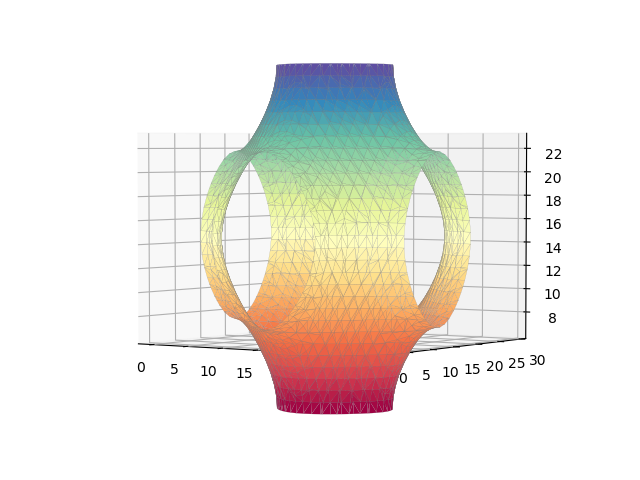

In [1]:
import numpy as np
import mcubes
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

def fun(x, y, z):
    return np.cos(x) + np.cos(y) + np.cos(z)
    #return x**2 + y**2 + z**2 - 0.25    # sphere

# grid size
n = 30j   # is a complex number because mgrid receive complex as imput

# creating a 3D grid
X, Y, Z = np.pi*np.mgrid[-1:1:n,-1:1:n,-1:1:n]

# defining a function in the grid
f = fun(X,Y,Z)

#compyting the isosurface 0
vertices, triangles = mcubes.marching_cubes(f, 0)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(vertices[:, 0], vertices[:,1], vertices[:, 2], triangles = triangles,
                cmap='Spectral',edgecolor='Gray',lw=0.1)
plt.show()

# Rotate and zoom in two notice the bad quality of the triangle mesh

In [57]:
def write_off(filename,vertices,faces):
    # write a triangle mesh in off format
    with open(filename,'wt') as fw:
        fw.write('OFF\n')
        fw.write(str(vertices.shape[0])+' '+str(faces.shape[0])+' 0\n')
        for i in range(vertices.shape[0]):
            fw.write('%10.6f %10.6f %10.6f\n' % (vertices[i,0],vertices[i,1],vertices[i,2]))
        for i in range(triangles.shape[0]):
            fw.write('3 %8d %8d %8d\n' % (triangles[i,0],triangles[i,1],triangles[i,2]))

In [58]:
write_off('func1.off',vertices,triangles)